#### Paris Physics Master Numerical Methods -- Exercises Lecture 4

- Name: Francisco Hernandez
- Name: Octavio Guerrero

Import modules and anything else you need

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Deterministic methods of numerical integration

### Simple qudrature rules

In this exercise we are going to implement and investigate the errors of the integration rules seen in class.

We will calculate the integral of the function:
    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the intervals $[0,1]$ and $[0,3]$

In terms of the error function the integral above is given by:
$$ \int_0^x f(x')dx' = \frac{1}{4} \left(\sqrt{\pi } \;\text{erf}(x)-2 e^{-x^2} x\right) $$
  
the numerical values of the integral for the two intervals are (as  calculated using `MATHEMATICA`)
$$0.1894723458204922$$ 
and 
$$0.4429185594236305$$



Let's begin by defining the function
$$ f(x) = x^2 \exp{(-x^2)}$$
and a function to calculate the abolute error
```python
def abs_error(numerical_value, actual_value):
    ...   
    return ...
```

In [5]:
def f(x):
    return (x**2 * np.exp(-x**2))

def abs_error(numerical_value, actual_value):
    return np.abs(actual_value - numerical_value)


Plot the function $f(x)$ over the interval $[0,4]$ and label the axes

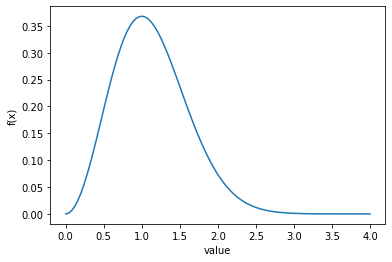

In [133]:
plt.plot(np.linspace(0,4, 100),np.array([f(n) for n in np.linspace(0,4, 100)]))
plt.xlabel("value")
plt.ylabel("f(x)")
plt.show()

Implement the left, right, mid-point, trapezoidal and Simpson's rules and test them on a simple, analytical integral

In [6]:
def parabole(x):
    return x**2


def left_method(interval, function,n):
    h = (interval[1]- interval[0])/n
    return h*(np.sum(np.array([function(interval[0] + i * h) for i in range(n)])))


def right_method(interval, function,n):
    h = (interval[1]- interval[0])/n
    return h*(np.sum(np.array([function(interval[0] + i * h) for i in range(1,n+1)])))

def mid_point(interval, function,n):
    h = (interval[1]- interval[0])/n
    return h*(np.sum(np.array([function((interval[0] + (i-1) * h + interval[0] + i * h)/2) for i in range(1,n+1)])))

def trapezoidal_method(interval, function,n):
    a = interval[0]
    b = interval[1]
    h = (b-a)/n
    return h*((function(a) + function(b))/2 + np.sum(np.array([function((a + i * h)) for i in range(1,n)])))

def simpson_method(interval, function,n):
   
    a = interval[0]
    b = interval[1]
    h = (b-a)/n
    return 2*h/3 * np.sum([function((a + (i-1) * h + a + i * h)/2) for i in range(1,n+1)]) + h/3 * np.sum([(function(a + (i-1)* h) + function(a + i * h))/2 for i in range(1,n+1)])
   



print(left_method([-1,1], parabole, 1000))
print(right_method([-1,1], parabole, 1000))
print(mid_point([-1,1], parabole, 1000))
print(trapezoidal_method([-1,1], parabole, 1000))
print(simpson_method([-1,1], parabole, 1000))




0.666668
0.666668
0.666666
0.666668
0.6666666666666666


For each of the five rules, calculate the integral of the function:
    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the interval $[0,1]$ and $[0,3]$ with 100 sub-intervals

Calculate the absolute errors and comment the results

In [135]:
print("Left method: interval [0,1]: ",left_method([0,1], f, 1000)," interval [0,3]: ",left_method([0,3], f, 1000))
print("Right method: interval [0,1]: ",right_method([0,1], f, 1000)," interval [0,3]: ",right_method([0,3], f, 1000))
print("Mid point method: interval [0,1]: ",mid_point([0,1], f, 1000)," interval [0,3]: ",mid_point([0,3], f, 1000))
print("Trapezoidal method: interval [0,1]: ",trapezoidal_method([0,1], f, 1000)," interval [0,3]: ",trapezoidal_method([0,3], f, 1000))
print("Simpson method: interval [0,1]: ",simpson_method([0,1], f, 1000)," interval [0,3]: ",simpson_method([0,3], f, 1000))


Left method: interval [0,1]:  0.1892884060999046  interval [0,3]:  0.44291688894853704
Right method: interval [0,1]:  0.18965628554107603  interval [0,3]:  0.4429202210132474
Mid point method: interval [0,1]:  0.18947234582049416  interval [0,3]:  0.4429185616449944
Trapezoidal method: interval [0,1]:  0.18947234582049033  interval [0,3]:  0.4429185549808922
Simpson method: interval [0,1]:  0.18947234582049288  interval [0,3]:  0.44291855942362696


We are now going to focus on the integration interval $[0,3]$ and compare the absolute error of the 5 rules for an increasing number of sub-intervals $n$ (go up to $n=10000$).

Plot your results (error versus number of sub-intervals) and comment.

In [138]:
values_left = np.array([left_method([0,3], f, n) for n in range(1000,10001)])
error_left_values = np.array([abs_error(i,0.4429185594236305) for i in values_left])

In [139]:
values_right = np.array([right_method([0,3], f, n) for n in range(1000,10001)])
error_right_values = np.array([abs_error(i,0.4429185594236305) for i in values_right])

In [140]:
values_mid_point = np.array([mid_point([0,3], f, n) for n in range(1000,10001)])
error_mid_point_values = np.array([abs_error(i,0.4429185594236305) for i in values_mid_point])

In [141]:
values_trapezoidal_method = np.array([trapezoidal_method([0,3], f, n) for n in range(1000,10001)])
error_trapezoidal_method_values = np.array([abs_error(i,0.4429185594236305) for i in values_trapezoidal_method])

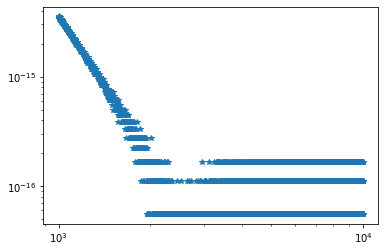

In [151]:
values_simpson_method = np.array([simpson_method([0,3], f, n) for n in range(1000,10001)])
error_simpson_method_values = np.array([np.float64(abs_error(i,0.4429185594236305)) for i in values_simpson_method])
#Let's plot this to see the particular behavior. Seems that it becomes noisy for n>1000
plt.loglog(np.arange(1000,10001), error_simpson_method_values,"*")
plt.show()

It is expected that the error depends on the number of sub-intervals $n$ as
    $$ \epsilon \propto \frac{1}{n^\alpha} $$

Using linear regression, determine the value of $\alpha$ for each of the rules.

Comment your work and results, and do not forget to label your plots.

In [7]:
#Define functions
def lin_reg(data1, data2):

    x_mean= np.mean(data1)
    y_mean = np.mean(data2)

    sum_1 = np.sum(data1*data2) - (data1.size * x_mean * y_mean)

    sum_2 = np.sum(data1**2) - (data1.size*x_mean**2)

    a1 = sum_1/sum_2
    a0 = y_mean - a1*x_mean

    return (a0,a1)

test_values = np.arange(1000,10001)



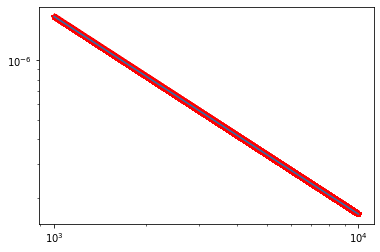

(-6.389826571910849, -1.000803408146725)


In [143]:
#Left Method fitting
linear_values_left = lin_reg(np.log(test_values),np.log(error_left_values))
plt.loglog(test_values,error_left_values,"*r")
plt.loglog(test_values,np.exp(linear_values_left[0])*(test_values**linear_values_left[1]))
plt.show()
print((linear_values_left))

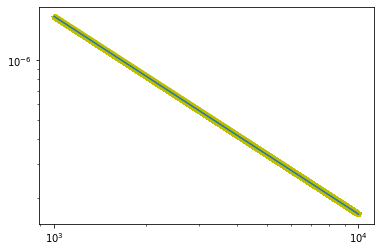

(-6.404808967039294, -0.9991949147711029)


In [144]:
#Right Method fitting

linear_values_right = lin_reg(np.log(test_values),np.log(error_right_values))
plt.loglog(test_values,error_right_values, '*y')
plt.loglog(test_values,np.exp(linear_values_right[0])*(test_values**linear_values_right[1]))
plt.show()
print(linear_values_right)

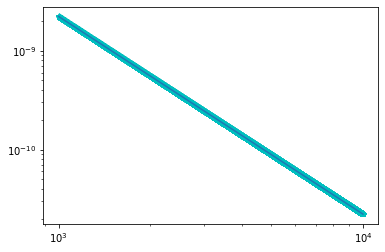

(-6.109653646910111, -1.9999968927055116)


In [147]:
#Mid point Method fitting

linear_values_mid_point = lin_reg(np.log(test_values),np.log(error_mid_point_values))
plt.loglog(test_values,error_mid_point_values, '*c')
plt.loglog(test_values,np.exp(linear_values_mid_point[0])*(test_values**linear_values_mid_point[1]))
plt.show()
print(linear_values_mid_point)

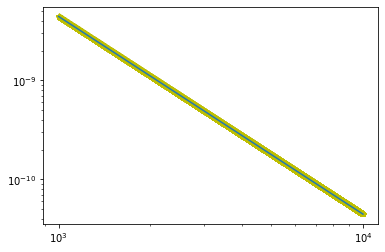

(-5.416483089468809, -1.999999872515285)


In [148]:
#Trapezoid Method fitting

linear_values_trapezoidal = lin_reg(np.log(test_values),np.log(error_trapezoidal_method_values))
plt.loglog(test_values,error_trapezoidal_method_values, '*y')
plt.loglog(test_values,np.exp(linear_values_trapezoidal[0])*(test_values**linear_values_trapezoidal[1]))
plt.show()
print(linear_values_trapezoidal)

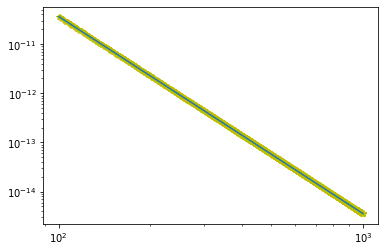

(-5.575006567624502, -4.008204006778886)


In [149]:
no_noise_values_simpson_method = np.array([simpson_method([0,3], f, n) for n in range(100,1001)])
no_noise_error_simpson_method_values = np.array([(abs_error(i,0.4429185594236305)) for i in no_noise_values_simpson_method])
test_values2 = np.arange(100,1001)
#Simpson Method fitting. We're only fittng values for n<1000, so we avoid the noisy part. 
x = np.log(test_values2)
y = np.log(no_noise_error_simpson_method_values)
linear_values_simpson = lin_reg(x,y)
plt.loglog(test_values2,no_noise_error_simpson_method_values, '*y')
plt.loglog(test_values2,np.exp((linear_values_simpson[0]))*(test_values2**linear_values_simpson[1]))
plt.show()
print(linear_values_simpson)

## Improper integrals

Integrate the improper integral  for $x = 1$
$$ \int_{-\infty}^x \frac{1}{\sqrt{2 \pi}} \exp{(-x^2/2)} \; dx  $$


In [150]:
#Split the integral and change variable 

def original_function(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-(x**2)/2)

def changed_function(x):
    return 1/np.sqrt(np.pi) * np.exp(-1/x**2)/x**2


integral_result1 = left_method([-1,1],original_function,1000)
integral_result2 = left_method([-np.sqrt(2),0],changed_function,1000)
print("Integral result: ",integral_result1 + integral_result2, " Wolfram result: 0.8413447") 
print("Absolut error: ", abs_error(integral_result1 + integral_result2, 0.8413447))



Integral result:  0.8414655499527343  Wolfram result: 0.8413447
Absolut error:  0.00012084995273431431


## Monte Carlo Integration

In this exercise you are going to:

- implement a Monte Carlo integration routine 
- find the integral of $f(x)=x^2$ over the interval $[-2,2]$ 
- study the dependence of the absolute error on the number of samples.

Define the function $f(x) and a function `montecarlo` that returns the integral.

```python
def montecarlo(f,a,b,n):
    """f is function to integrate over the interval [a,b] with n random points"""
    ...
    ...
    return I
```

In [8]:
def montecarlo(f,a,b,n):
    random_points = np.random.uniform(a,b,n)
    sample_mean = np.mean([f(random_points)])
    return (b-a)*sample_mean


Calculate the integral and the absolute error, do the same integral with one of the methods you developed earlier. Compare and comment your results.

In [9]:
I_Montecarlo = montecarlo(parabole,-2,2,10000)
I_simpson = simpson_method([-2,2],parabole,10000)
print("Montecarlo I=",I_Montecarlo," ActualValue:16/3 Absolut error:",abs_error(I_Montecarlo,16/3))
print("Simpson I=",I_simpson," ActualValue:16/3 Absolut error:",abs_error(I_simpson,16/3))


Montecarlo I= 5.350405335660659  ActualValue:16/3 Absolut error: 0.01707200232732564
Simpson I= 5.333333333333334  ActualValue:16/3 Absolut error: 8.881784197001252e-16


Study the dependence of the absolute error on the number of random samples $n$ with $n=10\dots10^4$

- For each value of $n$ calculate the integral $N=100$ times and take the mean value $\left< I(n)\right>$.
- Calculate the absolute error with respect to this mean, plot it as a function of $n$.
- Fit the data and remember that the error is expected to be
    $$E \sim \frac{1}{\sqrt{n}}$$
    
- For $N=1000$ and $n=1000$, plot the probability distribution function of $\left< I(n)\right>$. Comment. 

In [ ]:
def integral_array(n):
    integral_array = np.array([i*0 + montecarlo(parabole,-2,2,n) for i in range(100)])
    return integral_array

#Be careful running this one, for it could take really long time if your machine doesn't have enough power. For reference, it took about 1050 seconds on a M1 processor. 
testing_n = np.arange(10,10000)
integral_mean_array = np.array([np.mean(integral_array(j)) for j in testing_n]) 

(-1.4265655758504918, -0.49529061209685876)

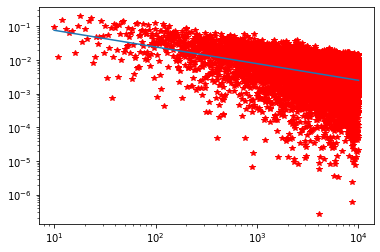

In [152]:
integral_error_abs = np.array([abs_error(k,16/3) for k in integral_mean_array])
##############Fitting and plotting#############################
fit_values = lin_reg(np.log(testing_n),np.log(integral_error_abs))
plt.loglog(testing_n, integral_error_abs, "*r")
plt.loglog(testing_n,np.exp((fit_values[0]))*(testing_n**fit_values[1]))
fit_values